<a href="https://colab.research.google.com/github/shfarhaan/ml-notebooks/blob/main/Decision_Trees_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision trees**
Decision trees are a popular machine learning algorithm used for both classification and regression tasks. They work by recursively partitioning the input space into regions and assigning a label or predicting a value for each region. Here are the basics of decision trees, along with examples and explanations:



## **Structure of a Decision Tree:**

1. **Nodes:**
   - **Root Node:** The topmost node that represents the entire dataset.
   - **Internal Nodes:** Nodes that split the dataset into subsets based on a feature.
   - **Leaf Nodes:** Terminal nodes that represent the final output (class label for classification or predicted value for regression).

2. **Edges:**
   - Connect nodes and represent the outcome of a split based on a specific feature.

3. **Features:**
   - Attributes or characteristics of the dataset that are used for decision-making.

## **Decision Tree Algorithm:**

1. **Step 1: Select a Feature to Split On**
   - Choose the feature that best separates the data into distinct classes or reduces variance in the case of regression.

2. **Step 2: Split the Data**
   - Divide the dataset into subsets based on the chosen feature.

3. **Step 3: Recursion**
   - Repeat steps 1 and 2 for each subset, treating them as new datasets.

4. **Stopping Criteria**
   - Define conditions to stop the tree-growing process (e.g., maximum depth, minimum samples per leaf).





### **Example:**

Let's consider a simple classification example: predicting whether a person will play tennis based on weather conditions (Outlook, Temperature, Humidity, Wind).

### **Sample Dataset:**

| Outlook   | Temperature | Humidity | Wind   | Play Tennis? |
|-----------|-------------|----------|--------|--------------|
| Sunny     | Hot         | High     | Weak   | No           |
| Sunny     | Hot         | High     | Strong | No           |
| Overcast  | Hot         | High     | Weak   | Yes          |
| Rain      | Mild        | High     | Weak   | Yes          |
| Rain      | Cool        | Normal   | Weak   | Yes          |
| Rain      | Cool        | Normal   | Strong | No           |
| Overcast  | Cool        | Normal   | Strong | Yes          |
| Sunny     | Mild        | High     | Weak   | No           |
| Sunny     | Cool        | Normal   | Weak   | Yes          |
| Rain      | Mild        | Normal   | Weak   | Yes          |
| Sunny     | Mild        | Normal   | Strong | Yes          |
| Overcast  | Mild        | High     | Strong | Yes          |
| Overcast  | Hot         | Normal   | Weak   | Yes          |
| Rain      | Mild        | High     | Strong | No           |



### Building a Decision Tree:

1. **Root Node:**
   - Choose the feature with the best information gain or Gini impurity. Let's say we choose "Outlook."

2. **Split 1 (Outlook):**
   - Three branches: Sunny, Overcast, Rain.

3. **Internal Nodes:**
   - For each branch, choose the feature with the best information gain or Gini impurity.

4. **Leaf Nodes:**
   - Assign the majority class for each subset.

### Resulting Tree:

```
Outlook
├── Sunny: No
├── Overcast: Yes
└── Rain
    ├── Wind
    │   ├── Weak: Yes
    │   └── Strong: No
    └── Humidity
        ├── High: No
        └── Normal: Yes
```



## **Interpretation:**

- If the outlook is overcast, play tennis.
- If the outlook is sunny, check the wind. If weak, play tennis; if strong, don't play.
- If the outlook is rain, check humidity. If high, don't play; if normal, play tennis.

This decision tree represents a simple model for deciding whether to play tennis based on weather conditions. Keep in mind that more sophisticated algorithms and parameter tuning can be applied for complex datasets.

## **Code Example:**

Let's use the famous Iris dataset, which contains features like sepal length, sepal width, petal length, and petal width, along with the species of iris flowers (setosa, versicolor, virginica).


In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (species)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Display the accuracy of the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Display the decision tree structure
tree_rules = export_text(clf, feature_names=iris.feature_names)
print("Decision Tree Rules:\n", tree_rules)

Accuracy: 1.00
Decision Tree Rules:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   

## **Explanation:**

1. **Import Libraries:**
   - We import the necessary libraries, including scikit-learn modules for datasets, model training, and decision tree implementation.

2. **Load the Dataset:**
   - Load the Iris dataset, which is included in scikit-learn.

3. **Split the Dataset:**
   - Split the dataset into training and testing sets using `train_test_split`.

4. **Initialize Decision Tree Classifier:**
   - Create an instance of the DecisionTreeClassifier.

5. **Train the Model:**
   - Use the training data (`X_train` and `y_train`) to train the decision tree classifier.

6. **Make Predictions:**
   - Use the trained model to make predictions on the test data (`X_test`).

7. **Evaluate Accuracy:**
   - Print the accuracy of the model on the test data.

8. **Display Decision Tree Rules:**
   - Use `export_text` to display the rules of the decision tree. This shows the conditions and decisions made at each node.



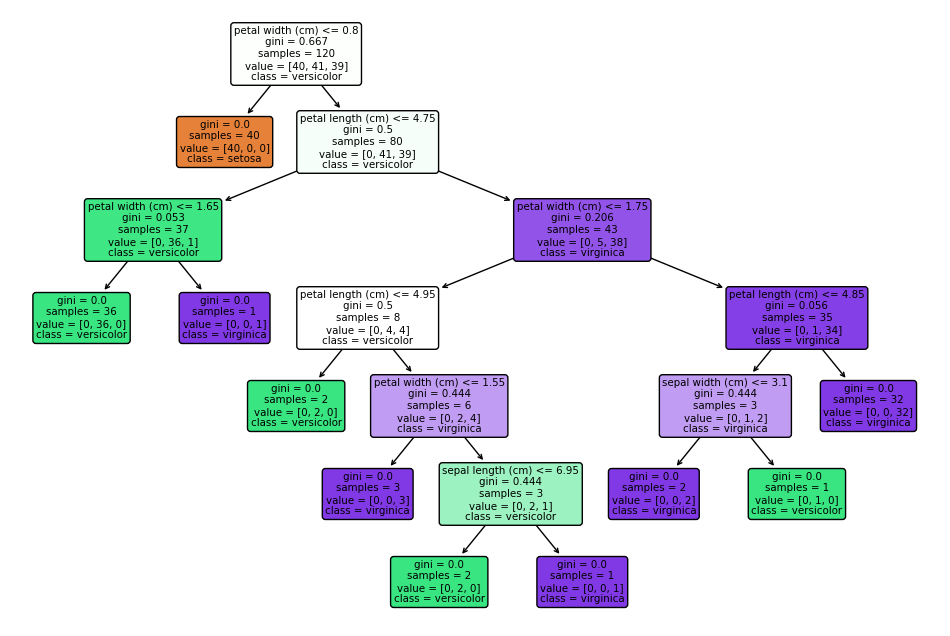

In [8]:
# Import necessary libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()


# **Random Forest**

Random Forest is an ensemble learning algorithm that combines the predictions of multiple decision trees to improve the overall accuracy and robustness of the model. It's widely used for both classification and regression tasks. Let's break down the basics of Random Forest with examples and explanations:


## **Decision Trees:**
Before diving into Random Forest, it's essential to understand decision trees. A decision tree is a flowchart-like structure where each node represents a decision based on the value of a particular feature. The leaves of the tree represent the outcome or decision.


## **Ensemble Learning:**
Ensemble learning involves combining multiple models to create a stronger and more accurate model. Random Forest is an ensemble of decision trees.

## **Random Forest Algorithm:**

1. **Bootstrap Sampling (Bagging):**
   - Random Forest builds multiple decision trees by using a technique called bootstrap sampling. It creates several random subsets of the training data by sampling with replacement. Each subset is used to train a different decision tree.

2. **Feature Randomization:**
   - When building each tree, Random Forest introduces randomness by considering only a random subset of features at each split. This helps to decorrelate the trees and make the ensemble more robust.

3. **Voting (Classification) or Averaging (Regression):**
   - For classification tasks, the Random Forest combines the predictions of individual trees through a majority voting mechanism. For regression tasks, it averages the predictions of individual trees.

## **Example:**

Suppose you have a dataset with information about customers and whether they purchased a product (binary classification: purchased or not purchased). Features include age, income, and browsing time. Here's how Random Forest works:

1. **Bootstrap Sampling:**
   - Randomly select subsets of the data with replacement. Let's say you have three subsets: Subset1, Subset2, Subset3.

2. **Build Decision Trees:**
   - For each subset, build a decision tree, considering only a random subset of features at each split.

   - Decision Tree 1: Trained on Subset1
   - Decision Tree 2: Trained on Subset2
   - Decision Tree 3: Trained on Subset3

3. **Voting (Classification) or Averaging (Regression):**
   - For a new input (customer), pass it through each decision tree. In classification, the class with the majority votes is the predicted class. In regression, the average of the predictions is the final prediction.


## **Advantages of Random Forest:**

- **Reduced Overfitting:** Random Forest mitigates overfitting by averaging the predictions of multiple trees.
  
- **Improved Accuracy:** By combining the predictions of multiple trees, Random Forest often provides more accurate results than individual decision trees.

- **Robustness:** Random Forest is robust to outliers and noisy data due to the aggregation of multiple trees.


## **Parameters to Consider:**

- **Number of Trees (n_estimators):** The number of decision trees in the forest.
  
- **Max Depth (max_depth):** The maximum depth of each decision tree.
  
- **Number of Features to Consider at Each Split (max_features):** The number of features considered for a split.

Fine-tuning these parameters is essential to achieve optimal performance for your specific task.

Random Forest is a powerful and versatile algorithm, widely used in various machine learning applications due to its effectiveness and robustness.

In [9]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


## **Explanation:**

1. **Import Libraries:**
   - `train_test_split` is used to split the dataset into training and testing sets.
   - `RandomForestClassifier` is the implementation of the Random Forest algorithm in scikit-learn.
   - `load_iris` is used to load the Iris dataset.
   - `accuracy_score` is used to evaluate the accuracy of the model.

2. **Load and Split Dataset:**
   - Load the Iris dataset, which is a built-in dataset in scikit-learn.
   - Split the dataset into training and testing sets.

3. **Create Random Forest Classifier:**
   - Instantiate a Random Forest classifier with 100 trees (`n_estimators`) and set the random seed for reproducibility.

4. **Train the Classifier:**
   - Fit the Random Forest classifier to the training data.

5. **Make Predictions:**
   - Use the trained model to make predictions on the test set.

6. **Evaluate Accuracy:**
   - Compare the predicted labels with the true labels from the test set to calculate the accuracy of the model.

Feel free to experiment with different parameters such as `max_depth`, `max_features`, and `n_estimators` to observe their impact on the model's performance. Adjusting these parameters can help you fine-tune the Random Forest for your specific task.

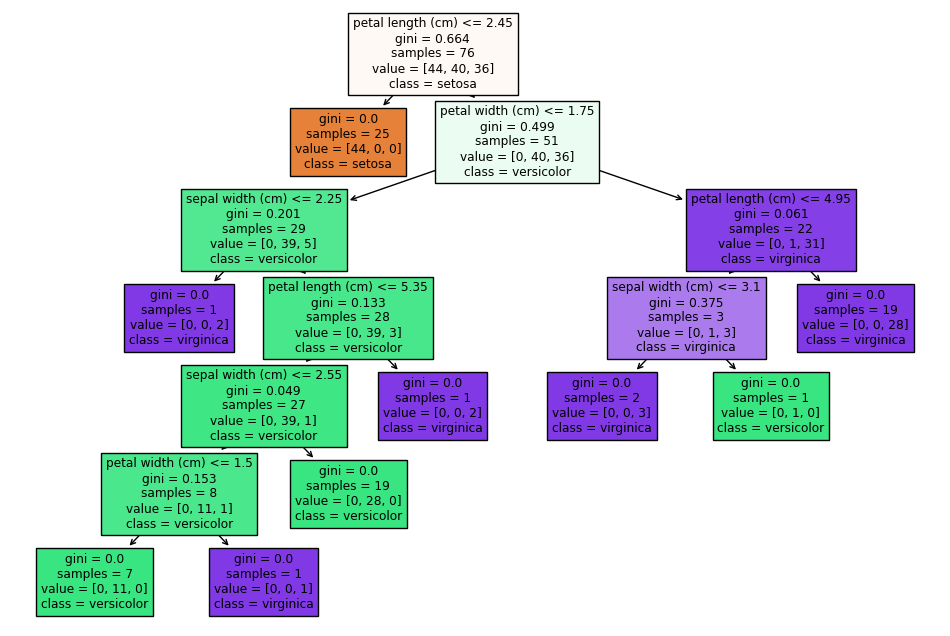

In [10]:
# Import necessary libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select an individual tree from the Random Forest (e.g., the first tree)
tree_to_visualize = rf_classifier.estimators_[10]  # rf_classifier is your trained Random Forest model

# Plot the selected tree
plt.figure(figsize=(12, 8))
plot_tree(tree_to_visualize, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


## **Explanation:**

1. **Import Libraries:**
   - `plot_tree` is used to visualize the decision tree.
   - `matplotlib.pyplot` is used for plotting.

2. **Select a Tree from the Random Forest:**
   - Access an individual tree from the Random Forest using `rf_classifier.estimators_[index]`. In this example, I selected the first tree (`index=0`).

3. **Plot the Tree:**
   - Use the `plot_tree` function to visualize the selected decision tree.
   - Specify `feature_names` and `class_names` to label the features and classes.

Run this code after training your Random Forest model (`rf_classifier` in the example). This will display the structure of the selected decision tree, including the splits and leaf nodes.

Keep in mind that Random Forest gains its power from the ensemble of trees, so understanding a single decision tree might not provide a complete picture of the model's complexity and decision-making process. If you're interested in the overall feature importances across the ensemble, you can also visualize feature importances using `rf_classifier.feature_importances_`.